In [92]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import numpy as np
np.set_printoptions(threshold=numpy.nan)
%matplotlib inline

In [116]:
def crop_image(img):
    return img[200:480,:,:]

def process_label(label):
    label_scaled = label[:, :, 0] * 255
    vehicle_indices = (label_scaled) == 10
    road_indices = (label_scaled) == 7
    roadline_indices = (label_scaled) == 6
    new_label = np.zeros_like(label_scaled)
    new_label[vehicle_indices] = 1
    new_label[road_indices] = 2
    new_label[roadline_indices] = 2
    return new_label

In [122]:
image_paths = ["Train/CameraRGB/" + f for f in os.listdir("Train/CameraRGB/")]
label_paths = ["Train/CameraSeg/" + f for f in os.listdir("Train/CameraSeg/")]
images = [cv2.resize(crop_image(mpimg.imread(f)), None,fx=0.5, fy=0.5) for f in image_paths]
labels = [cv2.resize(process_label(crop_image(mpimg.imread(f))), None,fx=0.5, fy=0.5) for f in label_paths]

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=42)

In [124]:
print(np.array(X_train[0]).shape)
print(np.array(X_train).shape)

(140, 400, 3)
(850, 140, 400, 3)


In [125]:
import pickle

pickle.dump(((X_train, y_train), (X_test, y_test)), open('data/carla.pkl', 'wb'))

In [132]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

print(np.array(X_test).shape)
print(np.array(y_test).shape)

850
150
850
150
(150, 140, 400, 3)
(150, 140, 400)


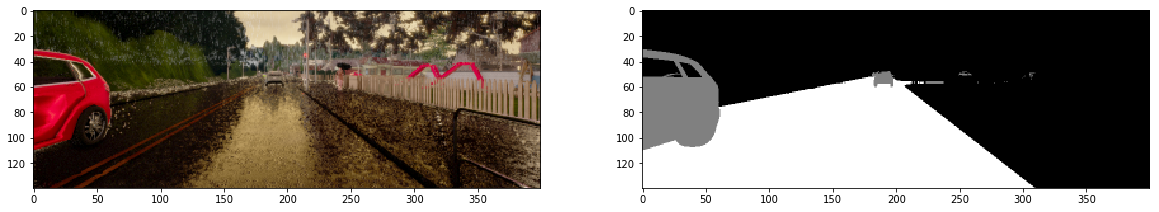

In [129]:
# 10 - Vehicles
# 7 - Roads
# 6 - Roadlines

def display_imgs(imgs, rows, cols, figsize=(20, 10), cmap="gray"):
    plt.figure(figsize=figsize)
    idx = 1
    for img in imgs:
        plt.subplot(rows, cols, idx)
        plt.imshow(img, cmap=cmap)
        idx += 1
        
display_imgs([X_train[40], y_train[40]], 1, 2)